In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [150]:
def selectBest(data, jump):
    indexes = data.index
    for i in range(indexes[0], indexes[-1], jump):
        print(i)
        indice_inicial = i
        indice_final = i + jump - 1

        subconjunto = data.loc[indice_inicial:indice_final]
        indice_maximo = subconjunto['weighted_avg'].nlargest(1).index

        print(data.loc[indice_maximo, "Another_Info"])

In [160]:
df = pd.read_csv("final_results.csv")
df.loc[((df['Method'] == "Reweighing") & (df['Another_Info'] == "No Reweighing")), 'Method'] = "BaseRL"
# Imprimindo o dataset ordenado
selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Adult")], 11) #=> 1
selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "German")], 11) #=> 0.2
selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Compas")], 11) #=> 0.8
df

0
10    1.0
Name: Another_Info, dtype: object
11
21    1.0
Name: Another_Info, dtype: object
22
32    1.0
Name: Another_Info, dtype: object
33
43    1.0
Name: Another_Info, dtype: object
44
54    1.0
Name: Another_Info, dtype: object
55
64    0.9
Name: Another_Info, dtype: object
66
69    0.3
Name: Another_Info, dtype: object
77
79    0.2
Name: Another_Info, dtype: object
88
93    0.5
Name: Another_Info, dtype: object
99
101    0.2
Name: Another_Info, dtype: object
110
118    0.8
Name: Another_Info, dtype: object
121
131    1.0
Name: Another_Info, dtype: object
132
140    0.8
Name: Another_Info, dtype: object
143
152    0.9
Name: Another_Info, dtype: object
154
163    0.9
Name: Another_Info, dtype: object


,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
0,0.586821,0.127198,0.0,DisparactImpactRemover,Adult,1.511947
1,0.586708,0.112494,0.1,DisparactImpactRemover,Adult,1.532005
2,0.586573,0.106573,0.2,DisparactImpactRemover,Adult,1.540022
3,0.581455,0.085569,0.3,DisparactImpactRemover,Adult,1.565427
4,0.578514,0.072411,0.4,DisparactImpactRemover,Adult,1.581515
...,...,...,...,...,...,...
343,0.617341,0.084904,With Reweighing,Reweighing,Compas,1.589826
344,0.610304,0.231155,No Reweighing,BaseRL,Compas,1.384998
345,0.619112,0.091275,With Reweighing,Reweighing,Compas,1.582264
346,0.649891,0.189088,No Reweighing,BaseRL,Compas,1.468501


In [155]:
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Adult")], 3) #=> 1
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "German")], 3) #=> 0.2 => 0.1
selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Compas")], 3) #=> 0.8

273
275    25.0
Name: Another_Info, dtype: object
276
278    25.0
Name: Another_Info, dtype: object
279
281    25.0
Name: Another_Info, dtype: object
282
283    1.0
Name: Another_Info, dtype: object
285
287    25.0
Name: Another_Info, dtype: object


In [161]:
df = df.drop((df.loc[(df['Another_Info'] != "1.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.2") & (df["Data_Name"] =="German") & (df["Method"] =="DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.8") & (df["Data_Name"] =="Compas") & (df["Method"] =="DisparactImpactRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "best eta = 10 ") & (df["Data_Name"] =="Adult") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="German") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="Compas") & (df["Method"] == "Optimizer")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.1") & (df["Data_Name"] =="German") & (df["Method"] =="PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Compas") & (df["Method"] =="PrejudiceRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] == "Test No Change") & (df["Method"] == "RejectClass")]).index)

df['Another_Info'].value_counts() # OK

Another_Info
Test with Change    15
No Reweighing       15
With Reweighing     15
best eta = 0.01     10
25.0                10
1.0                  5
0.2                  5
0.8                  5
best eta = 10        5
0.1                  5
Name: count, dtype: int64

In [163]:
ordem_desejada = ["BaseRL", "Reweighing", "DisparactImpactRemover", "Optimizer", "PrejudiceRemover" , "RejectClass"]

# Ordenando o dataset de acordo com a coluna e a ordem desejada
df = df.sort_values(by="Method", key=lambda x: x.map(ordem_desejada.index))
df

,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
332,0.784946,0.134921,No Reweighing,BaseRL,German,1.631062
320,0.681223,0.352529,No Reweighing,BaseRL,Adult,1.265256
322,0.687655,0.359610,No Reweighing,BaseRL,Adult,1.259771
324,0.686888,0.336566,No Reweighing,BaseRL,Adult,1.290818
326,0.682592,0.347759,No Reweighing,BaseRL,Adult,1.272682
...,...,...,...,...,...,...
311,0.639821,0.026003,Test with Change,RejectClass,Compas,1.685178
313,0.656669,0.062852,Test with Change,RejectClass,Compas,1.645760
315,0.666134,0.102096,Test with Change,RejectClass,Compas,1.598228
291,0.319684,0.046998,Test with Change,RejectClass,Adult,1.446885


<Axes: xlabel='Method', ylabel='F1-Score'>

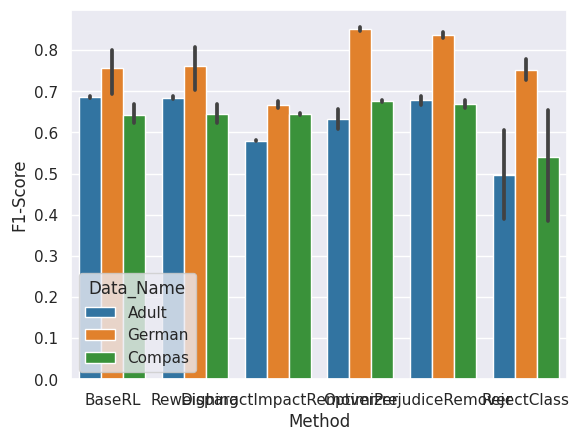

In [113]:
sns.barplot(df, x = "Method", y = "F1-Score", hue = "Data_Name" ,palette='tab10')

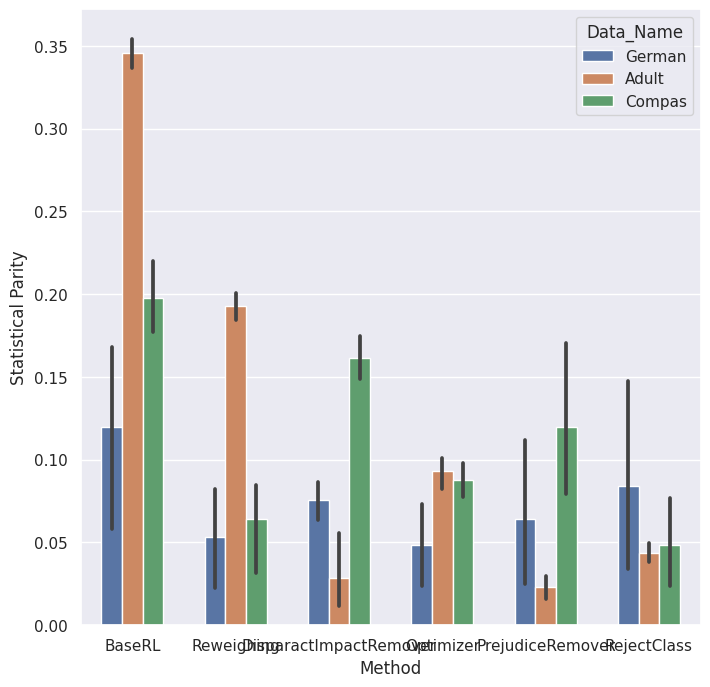

In [164]:
df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
sns.barplot(df, x = "Method", y = "Statistical Parity", hue = "Data_Name" , width=0.6)
plt.show()

<Figure size 900x800 with 0 Axes>

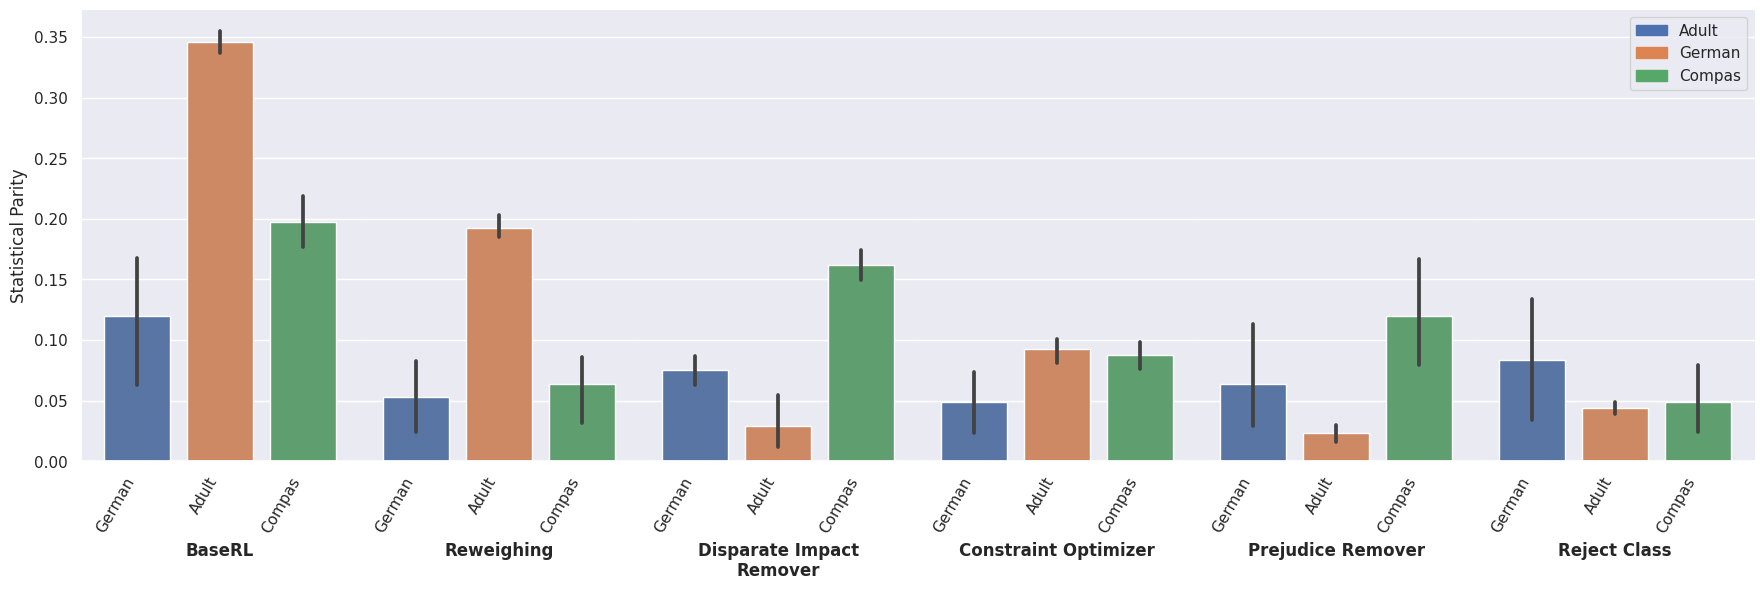

In [168]:
method_names = ["BaseRL","Reweighing", "Disparate Impact\nRemover", "Constraint Optimizer", "Prejudice Remover", "Reject Class"]
data_names = ["Adult", "German", "Compas"]
# Falta selecionar o best of Disparate Impact, Constraint Optimize e Prejudice Remover
# Também falta separar o Reweighing in NO reweighin e with reweighing

colors = sns.color_palette("deep", len(data_names))

df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
sns.set(style="darkgrid")
plt.figure(figsize=(9, 8))
g = sns.catplot(
    data=df, x="Data_Name", y="Statistical Parity", col="Method",
    kind="bar", height=6, aspect=0.5
)
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
g.set_xticklabels(rotation=60, horizontalalignment='right')
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel(method_names[i], fontdict={'weight': 'bold'})
    ax.set_title('')
    ax.margins(x=0.1) 

legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, data_names, loc="upper right", bbox_to_anchor=(1, 1))

plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()

<Figure size 900x800 with 0 Axes>

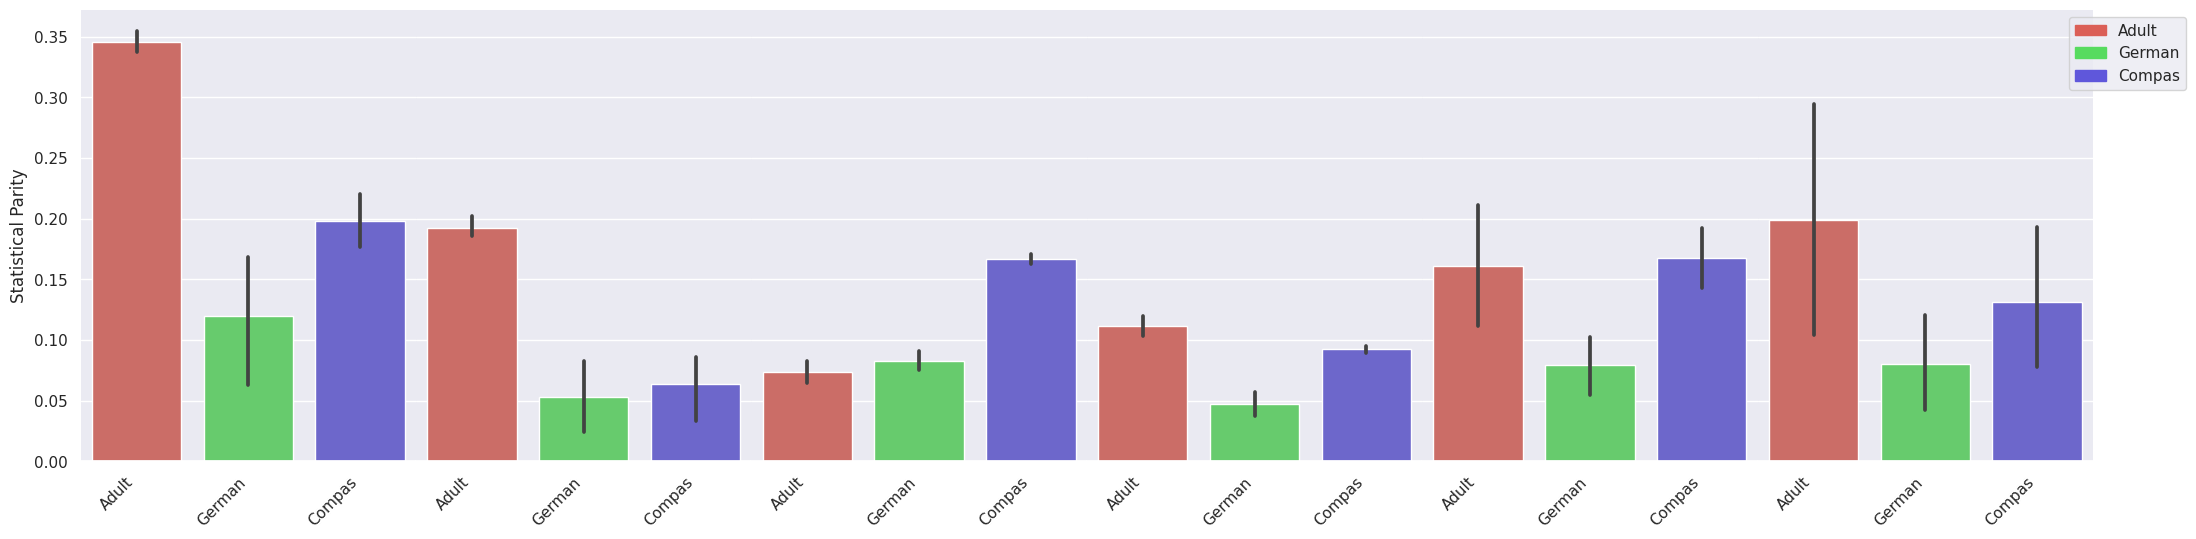

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seu código atual...

# Obter categorias únicas de "Data_Name"
data_names = df["Data_Name"].unique()

# Definir cores para as categorias de "Data_Name"
colors = sns.color_palette("hls", len(data_names))

# Ajustar largura e espaçamento das barras
plt.figure(figsize=(9, 8))
g = sns.catplot(
    data=df, x="Data_Name", y="Statistical Parity", col="Method",
    kind="bar", height=6, aspect=0.6, palette=colors
)
g.despine(left=True)
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set_titles("")
g.set_xlabels("")
g.set_ylabels("Statistical Parity")

# Adicionar legenda para as cores das categorias de "Data_Name"

plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()
